## File per il confronto tra autoencoder


In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch

In [2]:


# Load the .tsv file
data = pd.read_csv("data/GEL_data/catalogues_Lung_SBS.tsv", sep="\t")


In [3]:
print(data)

         GEL-2579316-11  GEL-2168392-11  GEL-2784036-11  GEL-2765846-11  \
A[C>A]A            1580            1835            1152             198   
A[C>A]C             986            1005             673             109   
A[C>A]G             441             466             283              30   
A[C>A]T             990            1067             790             108   
C[C>A]A            1938            2154            1368             121   
...                 ...             ...             ...             ...   
G[T>G]T              50              77              35              30   
T[T>G]A             118             175              79              56   
T[T>G]C              78              84              46              22   
T[T>G]G             139             173              89              37   
T[T>G]T             166             249              88              98   

         GEL-2330541-11  GEL-2913373-11  GEL-2631216-11  GEL-2959172-11  \
A[C>A]A            2100 

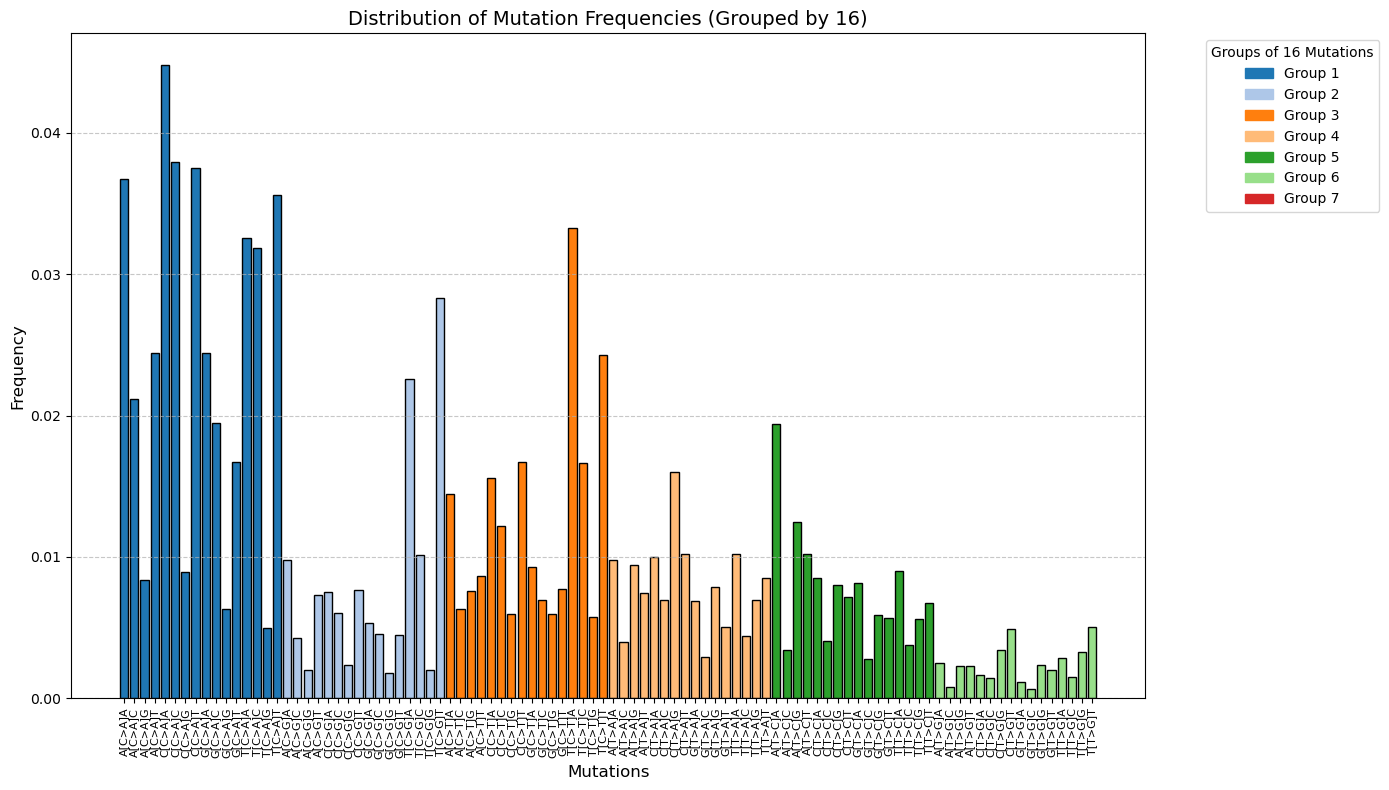

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame with rows as mutations and columns as patients
# Example dataset structure for reference:
# Mutation   Patient1  Patient2  Patient3
# A[A->C]A      3         5         2
# C[C->T]G      7         8         1

# Calculate the total counts for each mutation across patients
mutation_sums = data.sum(axis=1)

# Convert counts to frequencies
mutation_frequencies = mutation_sums / mutation_sums.sum()

# Group mutations into sets of 16 for coloring
num_groups = (len(mutation_frequencies) // 16) + 1
colors = plt.cm.tab20.colors  # Use a colormap with distinct colors

# Assign a color to each group of 16
bar_colors = [colors[i // 16 % len(colors)] for i in range(len(mutation_frequencies))]

# Plot the histogram
plt.figure(figsize=(14, 8))
bars = plt.bar(
    mutation_frequencies.index,
    mutation_frequencies.values,
    color=bar_colors,
    edgecolor="black",
)

# Customizing the x-axis for readability
plt.xticks(rotation=90, fontsize=8)
plt.title("Distribution of Mutation Frequencies (Grouped by 16)", fontsize=14)
plt.xlabel("Mutations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend for groups of 16
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_groups)]
labels = [f"Group {i+1}" for i in range(num_groups)]
plt.legend(handles, labels, title="Groups of 16 Mutations", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
from models import NMF_AE

In [6]:
autoencoder = NMF_AE.AE_NMF_pg(patient_dim = 1009, latent_dim=96)

In [7]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

print(numeric_data)

# Convert the numeric data to a tensor
data_tensor = torch.tensor(numeric_data.values, dtype=torch.float32)

         GEL-2579316-11  GEL-2168392-11  GEL-2784036-11  GEL-2765846-11  \
A[C>A]A            1580            1835            1152             198   
A[C>A]C             986            1005             673             109   
A[C>A]G             441             466             283              30   
A[C>A]T             990            1067             790             108   
C[C>A]A            1938            2154            1368             121   
...                 ...             ...             ...             ...   
G[T>G]T              50              77              35              30   
T[T>G]A             118             175              79              56   
T[T>G]C              78              84              46              22   
T[T>G]G             139             173              89              37   
T[T>G]T             166             249              88              98   

         GEL-2330541-11  GEL-2913373-11  GEL-2631216-11  GEL-2959172-11  \
A[C>A]A            2100 

In [8]:
result = NMF_AE.train_AENMF_tol(model = autoencoder,
                       x_train = numeric_data,
                       criterion = nn.MSELoss(),
                       optimizer = optim.Adam(autoencoder.parameters(), lr=0.01),
                       tol = 1e-3,
                       relative_tol=False,
                       max_iter = 100000)

In [9]:
signature = result[2]
exposures_train = result[3]
enc_mat = result[4]

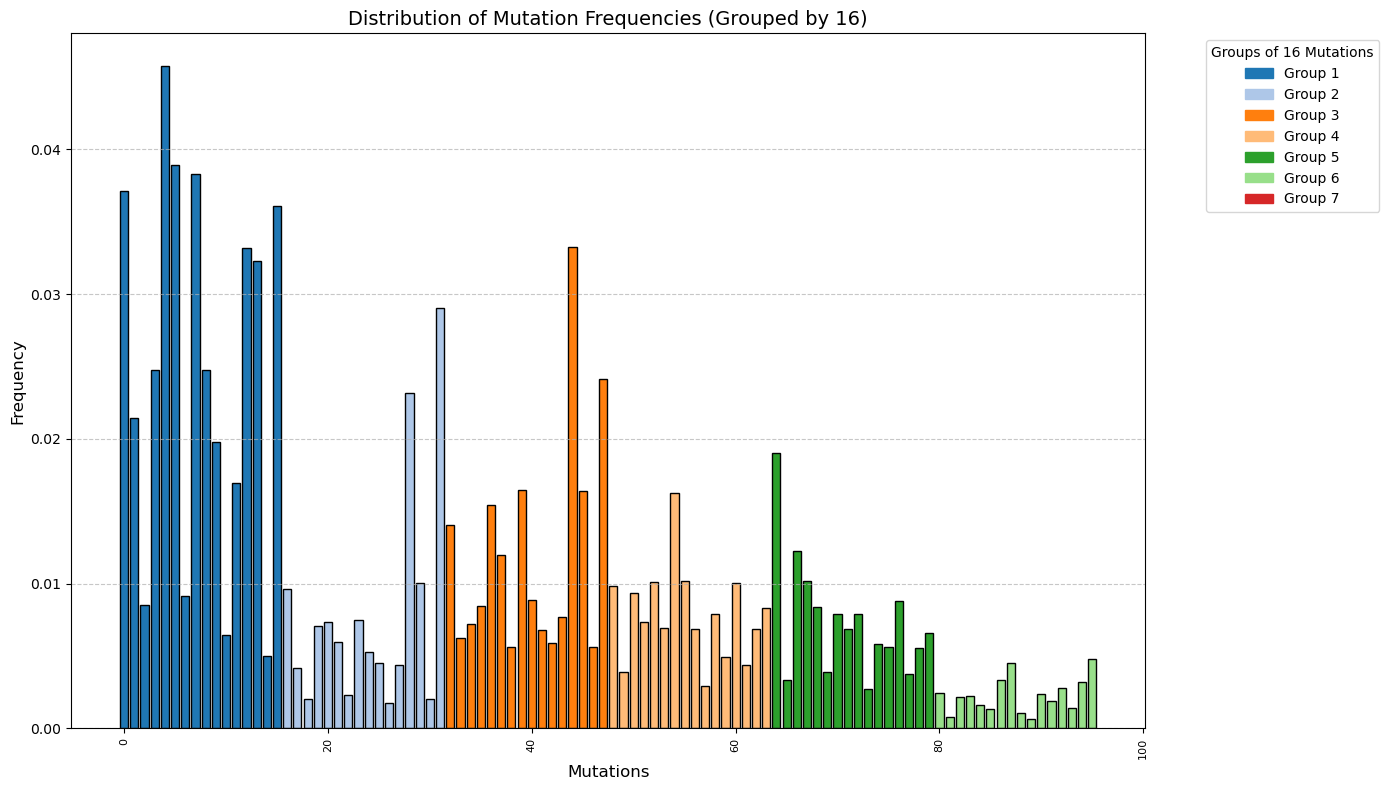

In [10]:
data1 = signature@exposures_train

data = pd.DataFrame(data1, columns=numeric_data.columns)

# Calculate the total counts for each mutation across patients
mutation_sums = data.sum(axis=1)

# Convert counts to frequencies
mutation_frequencies = mutation_sums / mutation_sums.sum()

# Group mutations into sets of 16 for coloring
num_groups = (len(mutation_frequencies) // 16) + 1
colors = plt.cm.tab20.colors  # Use a colormap with distinct colors

# Assign a color to each group of 16
bar_colors = [colors[i // 16 % len(colors)] for i in range(len(mutation_frequencies))]

# Plot the histogram
plt.figure(figsize=(14, 8))
bars = plt.bar(
    mutation_frequencies.index,
    mutation_frequencies.values,
    color=bar_colors,
    edgecolor="black",
)

# Customizing the x-axis for readability
plt.xticks(rotation=90, fontsize=8)
plt.title("Distribution of Mutation Frequencies (Grouped by 16)", fontsize=14)
plt.xlabel("Mutations", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend for groups of 16
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(num_groups)]
labels = [f"Group {i+1}" for i in range(num_groups)]
plt.legend(handles, labels, title="Groups of 16 Mutations", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()